In [13]:
#If the gender wage gap exists, is the data statistically significant?

In [14]:
%matplotlib inline
#Dependencies and Setup
import matplotlib.pyplot as plt


#Import our data into pandas from CSV
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(font_scale=1.5)

plt.style.use('ggplot')

#data = pd.read_csv("filename.csv") 


# Load in csv
data_df = pd.read_csv("all_interesting_info.csv")

# Get data City and Ride Data
#data_df = pd.read_csv(all_interesting_info)


data_df.head()


,id,latest.admissions.admission_rate.overall,latest.aid.median_debt.completers.overall,latest.aid.median_debt.female_students,latest.aid.median_debt.male_students,latest.aid.median_debt.noncompleters,latest.completion.completion_rate_4yr_150nt,latest.completion.completion_rate_four_year_100_pooled,latest.cost.attendance.academic_year,latest.cost.tuition.in_state,...,latest.repayment.5_yr_repayment.completers_rate,latest.repayment.5_yr_repayment.female_students_rate,latest.repayment.5_yr_repayment.male_students_rate,latest.repayment.7_yr_repayment.completers_rate,latest.repayment.7_yr_repayment.female_students_rate,latest.repayment.7_yr_repayment.male_students_rate,latest.student.demographics.female_share,location.lat,location.lon,school.name
0,459842,1.0000,23139.5,12250.0,9500.0,7730.0,0.3478,0.2000,26772,13390,...,0.495575,0.316121,0.364816,0.627481,0.374540,0.556589,0.813547,42.603889,-87.857452,Herzing University-Kenosha
1,457022,1.0000,23139.5,12250.0,9500.0,7730.0,0.2708,0.4000,26916,13390,...,0.495575,0.316121,0.364816,0.627481,0.374540,0.556589,0.813547,41.639266,-83.665453,Herzing University-Toledo
2,184694,0.7909,25000.0,20000.0,16709.0,9649.0,0.5317,0.3850,53748,40234,...,0.777037,0.670504,0.683209,0.861512,0.730086,0.767308,0.588029,40.774498,-74.432121,Fairleigh Dickinson University-Florham Campus
3,445708,0.8174,25899.0,17850.0,17668.0,7666.5,0.5722,0.3753,44949,30746,...,0.822471,0.696578,0.681546,0.810641,0.705139,0.672380,0.635340,35.233502,-80.851208,Johnson & Wales University-Charlotte
4,146481,0.5694,27000.0,26000.0,25500.0,8250.0,0.6990,0.6482,54777,44116,...,0.899160,0.818462,0.832618,0.934247,0.894737,0.859649,0.603041,42.249574,-87.827454,Lake Forest College


In [15]:
data_df['id'].nunique()

1277

Overview of the gender earnings

In [16]:
def process_pay(df):
    cols = ['latest.earnings.10_yrs_after_entry.male_students','latest.earnings.10_yrs_after_entry.female_students']
    
    print('Checking for nulls:')
    for col in cols:
        df[col] = pd.to_numeric(df[col], errors ='coerce')
        print(len(col)*'-')
        print(col)
        print(len(col)*'-')
        print(df[col].isnull().value_counts())
        
    return df
data_df = process_pay(data_df.copy())

Checking for nulls:
------------------------------------------------
latest.earnings.10_yrs_after_entry.male_students
------------------------------------------------
False    1277
Name: latest.earnings.10_yrs_after_entry.male_students, dtype: int64
--------------------------------------------------
latest.earnings.10_yrs_after_entry.female_students
--------------------------------------------------
False    1277
Name: latest.earnings.10_yrs_after_entry.female_students, dtype: int64


C:\Users\kim.harlan\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


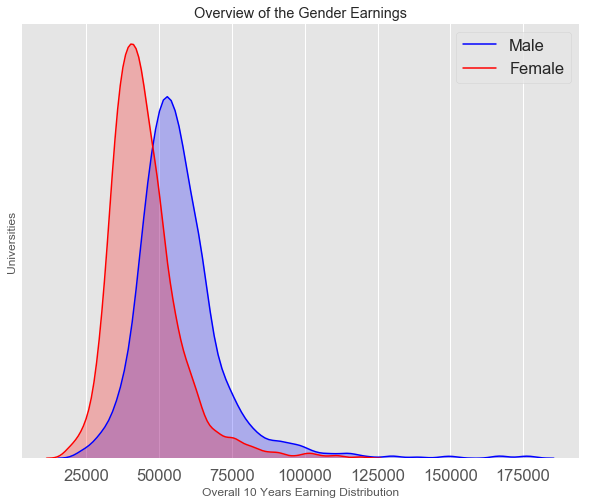

In [6]:
plt.figure(figsize=(10,8))
#sns.kdeplot(data_df['latest.earnings.10_yrs_after_entry.male_students'], label='Male Students')
#sns.kdeplot(data_df['latest.earnings.10_yrs_after_entry.female_students'], label='Female Students')


ax = sns.kdeplot(data_df['latest.earnings.10_yrs_after_entry.mean_earnings.male_students'], color ='Blue', label='Male', shade=True)
ax = sns.kdeplot(data_df['latest.earnings.10_yrs_after_entry.mean_earnings.female_students'], color='Red', label='Female', shade=True)

plt.xlabel('Overall 10 Years Earning Distribution')
plt.ylabel('Universities')
plt.title('Overview of the Gender Earnings')
plt.yticks([])
plt.show()

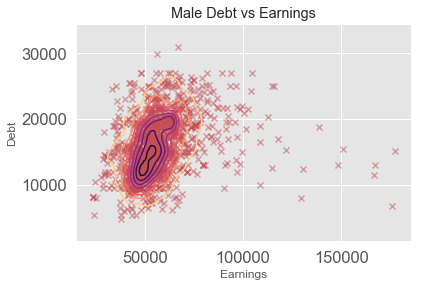

In [23]:
sns.kdeplot(data_df['latest.earnings.10_yrs_after_entry.mean_earnings.male_students'], data_df['latest.aid.median_debt.male_students'], cmap='magma_r')
plt.scatter(data_df['latest.earnings.10_yrs_after_entry.mean_earnings.male_students'], data_df['latest.aid.median_debt.male_students'], marker='x', color='r', alpha=0.5)
plt.xlabel('Earnings')
plt.ylabel('Debt')
plt.title('Male Debt vs Earnings')
plt.show()

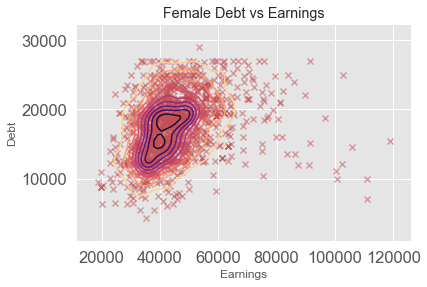

In [25]:
sns.kdeplot(data_df['latest.earnings.10_yrs_after_entry.mean_earnings.female_students'], data_df['latest.aid.median_debt.female_students'], cmap='magma_r')
plt.scatter(data_df['latest.earnings.10_yrs_after_entry.mean_earnings.female_students'], data_df['latest.aid.median_debt.female_students'], marker='x', color='r', alpha=0.5)
plt.xlabel('Earnings')
plt.ylabel('Debt')
plt.title('Female Debt vs Earnings')
plt.show()